# imports

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import plotly.express as px

from category_encoders import TargetEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import explained_variance_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
!pip install kaggle

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import os
import shutil

source_path = '/content/gdrive/MyDrive/kaggle/kaggle.json'
destination_dir = '/root/.kaggle/'
destination_path = os.path.join(destination_dir, 'kaggle.json')

os.makedirs(destination_dir, exist_ok=True)
shutil.copy(source_path, destination_path)

!chmod 600 {destination_path}

In [9]:
#API
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 511kB/s]
100% 172k/172k [00:00<00:00, 510kB/s]


In [10]:
!unzip -o telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [11]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.shape

(7043, 21)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# data processing

## fill na

TotalCharges

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df['TotalCharges'].fillna(0.00, inplace=True)

## adding columns

In [18]:
for index, row in df.iterrows():
    if row['TotalCharges'] == 0:
        df.at[index, 'MeanMonthlyCharges'] = 0
    else:
        df.at[index, 'MeanMonthlyCharges'] = row['TotalCharges'] / row['tenure']

In [19]:
df['MeanMonthlyCharges_MonthlyCharges_Diff'] = df['MeanMonthlyCharges'] - df['MonthlyCharges']

### histogram

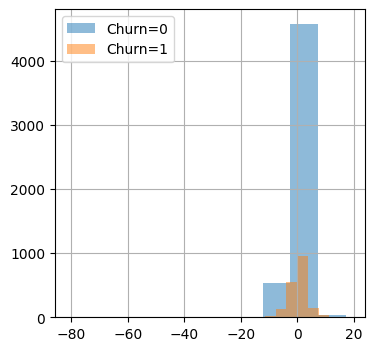

In [20]:
churn_0 = df[df['Churn'] == 'No']
churn_1 = df[df['Churn'] == 'Yes']

churn_0['MeanMonthlyCharges_MonthlyCharges_Diff'].hist(figsize=(4, 4), bins=10, alpha=0.5, label='Churn=0')
churn_1['MeanMonthlyCharges_MonthlyCharges_Diff'].hist(figsize=(4, 4), bins=10, alpha=0.5, label='Churn=1')

plt.legend()
plt.show()

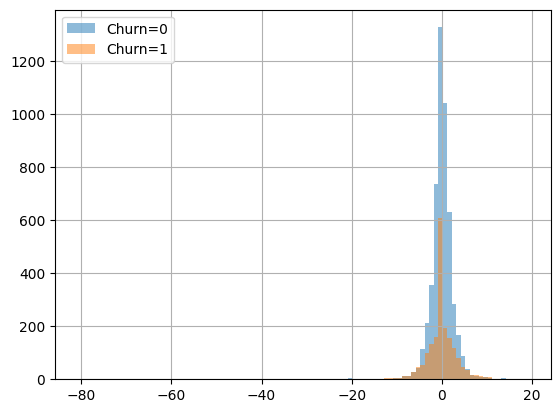

In [21]:
churn_0_data = churn_0['MeanMonthlyCharges_MonthlyCharges_Diff']
churn_1_data = churn_1['MeanMonthlyCharges_MonthlyCharges_Diff']


min_value = min(churn_0_data.min(), churn_1_data.min())
max_value = max(churn_0_data.max(), churn_1_data.max())

bins = np.arange(min_value, max_value + 1, 1)


plt.hist(churn_0_data, bins=bins, alpha=0.5, label='Churn=0')
plt.hist(churn_1_data, bins=bins, alpha=0.5, label='Churn=1')
plt.grid()
plt.legend()
plt.show()

## churn column encoding

In [22]:
slownik = {'Yes':1,
           'No':0}

In [23]:
df['Churn'] = df['Churn'].map(slownik)

## replace

replace 'No internet service' with 'No'

In [24]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(['No internet service', 'No phone service'],'No')

## drop

In [25]:
df[['customerID']].shape

(7043, 1)

In [26]:
df['customerID'].nunique()

7043

In [27]:
df = df.drop(columns=['customerID'])

## encoding

#### label (binary)

In [28]:
slownik2 = {'Yes': 1,
            'No': 0,
            'Female': 1,
            'Male': 0}

In [29]:
cols_for_binary_label_encoding = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [30]:
for col in df[cols_for_binary_label_encoding]:
    df[col] = df[col].map(slownik2)

#### label (ordinal)

In [31]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [32]:
slownik3 = {'Month-to-month': 0,
            'One year': 1,
            'Two year': 2}

In [33]:
df['Contract'] = df['Contract'].map(slownik3)

#### target

In [34]:
target_encoder = TargetEncoder()

In [35]:
cols_for_target_encoding = ['InternetService', 'PaymentMethod']

In [36]:
df_encoded = target_encoder.fit_transform(df[cols_for_target_encoding], df['Churn'])
df[cols_for_target_encoding] = df_encoded

#### charts

##### scatter

In [37]:
num_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

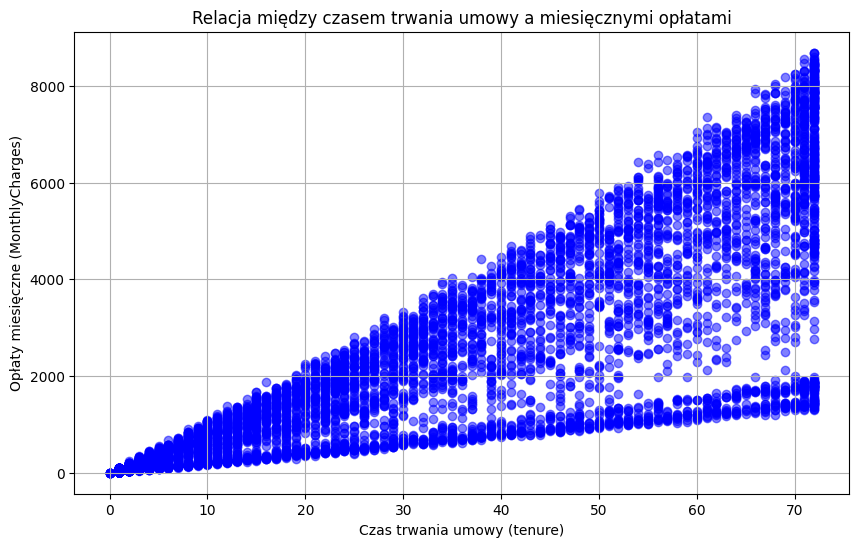

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(num_df['tenure'], num_df['TotalCharges'], c='blue', marker='o', alpha=0.5)

plt.title('Relacja między czasem trwania umowy a miesięcznymi opłatami')
plt.xlabel('Czas trwania umowy (tenure)')
plt.ylabel('Opłaty miesięczne (MonthlyCharges)')
plt.grid(True)

plt.show()

##### pairplot

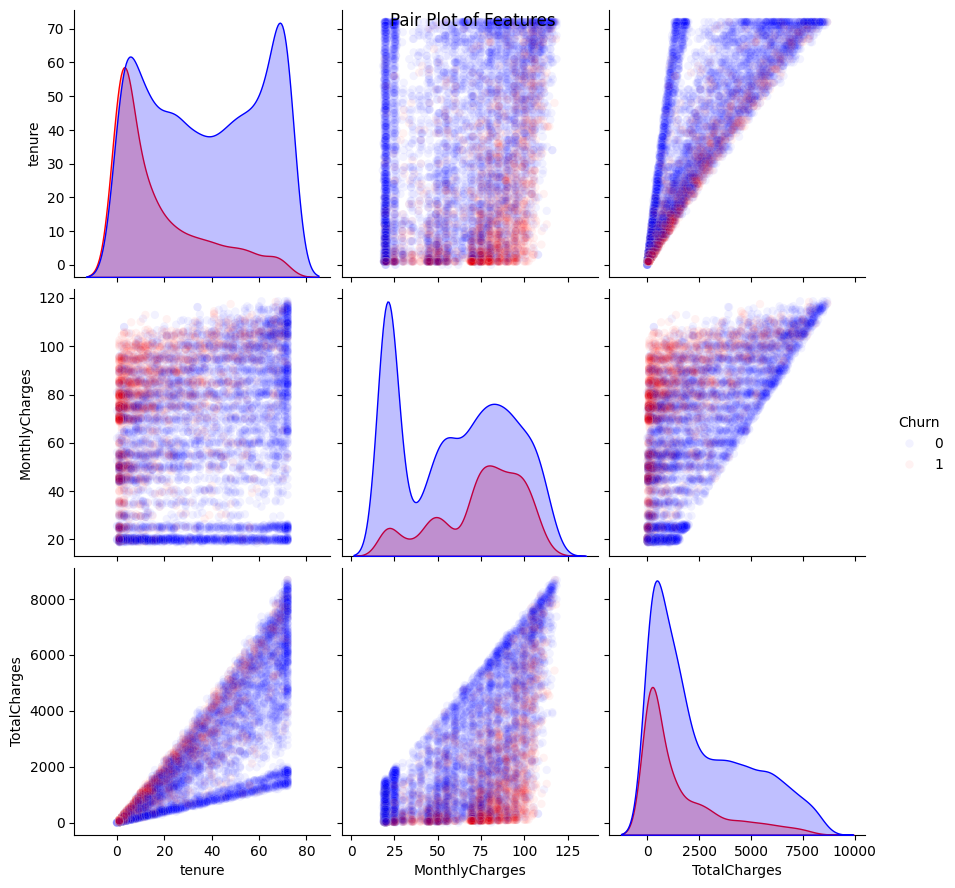

In [39]:
colors = {0: 'blue', 1: 'red'}

# Create pair plot with defined colors
sns.pairplot(num_df, hue='Churn', palette=colors, plot_kws={'alpha': 0.05}, height=3)
plt.suptitle('Pair Plot of Features')
plt.show()

## modify df functions

### v2

df with scaled data + SMOTE

In [40]:
numerical_columns = ['tenure', 'InternetService', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MeanMonthlyCharges', 'MeanMonthlyCharges_MonthlyCharges_Diff']
scaler = StandardScaler()
smote = SMOTE(random_state=13)

def modify_df_v2(df):
    df_2 = df.copy()

    #scaler
    df_2[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    X_2 = df_2.drop(['Churn'], axis=1)
    y_2 = df_2['Churn']

    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=13)

    # SMOTE
    X_train_2, y_train_2 = smote.fit_resample(X_train_2, y_train_2)

    return X_train_2, X_test_2, y_train_2, y_test_2

X_train_2, X_test_2, y_train_2, y_test_2 = modify_df_v2(df)

### v5

df with scaled data + SMOTE + PCA (2) on all binary columns with n_components=7

In [41]:
numerical_columns = ['tenure', 'InternetService', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MeanMonthlyCharges', 'MeanMonthlyCharges_MonthlyCharges_Diff']
scaler = StandardScaler()
smote = SMOTE(random_state=13)

def modify_df_v5(df):
    df_5 = df.copy()

    # scaler
    df_5[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # PCA
    features_for_pca = df_5[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]
    pca = PCA(n_components=7)
    pca_result = pca.fit_transform(features_for_pca)

    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
    df_5.drop(columns=features_for_pca, axis=1, inplace=True)
    df_with_pca = pd.concat([df_5.reset_index(drop=True), pca_df], axis=1)

    X_5 = df_with_pca.drop(['Churn'], axis=1)
    y_5 = df_with_pca['Churn']

    X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=13)

    # SMOTE
    X_train_5, y_train_5 = smote.fit_resample(X_train_5, y_train_5)

    return X_train_5, X_test_5, y_train_5, y_test_5

X_train_5, X_test_5, y_train_5, y_test_5 = modify_df_v5(df)

# models

## grid search

### random forest

In [42]:
rf = RandomForestClassifier(random_state=13)
lr = LogisticRegression(random_state=13)
knn = KNeighborsClassifier()

In [43]:
param_grid_rf = {
    'max_depth': [4, 8, 12],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [4, 8, 12],
    'n_estimators': [50, 100, 150]
}

grid_search_rf_2 = GridSearchCV(estimator=rf,
                           param_grid=param_grid_rf,
                           return_train_score=True,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           refit = 'f1',
                           n_jobs=-1)

grid_search_rf_5 = GridSearchCV(estimator=rf,
                           param_grid=param_grid_rf,
                           return_train_score=True,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           refit = 'f1',
                           n_jobs=-1)

grid_search_rf_2.fit(X_train_2, y_train_2)
results_rf_2 = pd.DataFrame(grid_search_rf_2.cv_results_).assign(df_version='v2', model='random forest')

grid_search_rf_5.fit(X_train_5, y_train_5)
results_rf_5 = pd.DataFrame(grid_search_rf_5.cv_results_).assign(df_version='v5', model='random forest')

### logistic regression

In [44]:
param_grid_lr = {
    'C': [1.0, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [500]
}

grid_search_lr_2 = GridSearchCV(estimator=lr,
                           param_grid=param_grid_lr,
                           return_train_score=True,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           refit = 'f1',
                           n_jobs=-1)

grid_search_lr_5 = GridSearchCV(estimator=lr,
                           param_grid=param_grid_lr,
                           return_train_score=True,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           refit = 'f1',
                           n_jobs=-1)

grid_search_lr_2.fit(X_train_2, y_train_2)
results_lr_2 = pd.DataFrame(grid_search_lr_2.cv_results_).assign(df_version='v2', model='logistic regression')

grid_search_lr_5.fit(X_train_5, y_train_5)
results_lr_5 = pd.DataFrame(grid_search_lr_5.cv_results_).assign(df_version='v5', model='logistic regression')

### knn

In [45]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20],
    'p': [1, 2]
}

grid_search_knn_2 = GridSearchCV(estimator=knn,
                           param_grid=param_grid_knn,
                           return_train_score=True,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           refit = 'f1',
                           n_jobs=-1)

grid_search_knn_5 = GridSearchCV(estimator=knn,
                           param_grid=param_grid_knn,
                           return_train_score=True,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           refit = 'f1',
                           n_jobs=-1)

grid_search_knn_2.fit(X_train_2, y_train_2)
results_knn_2 = pd.DataFrame(grid_search_knn_2.cv_results_).assign(df_version='v2', model='knn')

grid_search_knn_5.fit(X_train_5, y_train_5)
results_knn_5 = pd.DataFrame(grid_search_knn_5.cv_results_).assign(df_version='v5', model='knn')

## results

In [46]:
results = pd.concat([results_rf_2, results_rf_5, results_lr_2, results_lr_5, results_knn_2, results_knn_5])
results = results.reset_index(drop=True)

In [47]:
results['mean_test_f1'].max()

0.845790983528128

In [48]:
max_accuracy_index = results['mean_test_accuracy'].idxmax()
max_accuracy_row = results.loc[max_accuracy_index]

max_f_index = results['mean_test_f1'].idxmax()
max_f_row = results.loc[max_f_index]

In [49]:
print(max_accuracy_row['params'], max_accuracy_row['mean_test_accuracy'], max_accuracy_row['mean_test_f1'], max_accuracy_row['model'], max_accuracy_row['df_version'])
print('\n')
print(max_f_row['params'], max_f_row['mean_test_accuracy'], max_f_row['mean_test_f1'], max_f_row['model'], max_f_row['df_version'])

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'} 0.8311987959547015 0.845790983528128 knn v5


{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'} 0.8311987959547015 0.845790983528128 knn v5


In [50]:
grid_searches = [grid_search_rf_2, grid_search_rf_5,
                 grid_search_lr_2, grid_search_lr_5,
                 grid_search_knn_2, grid_search_knn_5]

for el in grid_searches:
    print("Nazwa modelu:", el.estimator)
    print("Najlepsza kombinacja parametrów:", el.best_params_)
    print("Najlepszy wynik uzyskany za pomocą powyższej kombinacji parametrów:", el.best_score_)
    print("")

Nazwa modelu: RandomForestClassifier(random_state=13)
Najlepsza kombinacja parametrów: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
Najlepszy wynik uzyskany za pomocą powyższej kombinacji parametrów: 0.831052747705942

Nazwa modelu: RandomForestClassifier(random_state=13)
Najlepsza kombinacja parametrów: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
Najlepszy wynik uzyskany za pomocą powyższej kombinacji parametrów: 0.8340701239818584

Nazwa modelu: LogisticRegression(random_state=13)
Najlepsza kombinacja parametrów: {'C': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Najlepszy wynik uzyskany za pomocą powyższej kombinacji parametrów: 0.7913841224315059

Nazwa modelu: LogisticRegression(random_state=13)
Najlepsza kombinacja parametrów: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Najlepszy wynik uzyskany za pomocą powyższej kombinacji parametrów: 0.776870396930909

Na

## best model

In [51]:
cv_results = grid_search_knn_5.cv_results_

In [52]:
best_model = grid_search_knn_5.best_estimator_

In [53]:
best_model

KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance')

In [54]:
results = results[['model', 'params', 'mean_test_accuracy', 'mean_train_accuracy', 'mean_test_f1', 'mean_train_f1', 'std_train_accuracy', 'std_test_accuracy', 'std_train_f1', 'std_test_f1', 'df_version']]

results['params'] = results['params'].astype('str')

results['x'] = results['df_version'] + ' ' + results['model'] + ' ' + results['params']
results = results.sort_values(by='mean_test_f1', ascending=True)

<ipython-input-54-8864e2cb21eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['params'] = results['params'].astype('str')
<ipython-input-54-8864e2cb21eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['x'] = results['df_version'] + ' ' + results['model'] + ' ' + results['params']


In [55]:
results.reset_index()

,index,model,params,mean_test_accuracy,mean_train_accuracy,mean_test_f1,mean_train_f1,std_train_accuracy,std_test_accuracy,std_train_f1,std_test_f1,df_version,x
0,143,logistic regression,"{'C': 0.0025, 'max_iter': 500, 'penalty': 'l2'...",0.759816,0.760210,0.769915,0.770429,0.003599,0.013738,0.003241,0.011877,v5,"v5 logistic regression {'C': 0.0025, 'max_iter..."
1,141,logistic regression,"{'C': 0.005, 'max_iter': 500, 'penalty': 'l2',...",0.762846,0.762876,0.771326,0.771486,0.003825,0.014476,0.003305,0.012411,v5,"v5 logistic regression {'C': 0.005, 'max_iter'..."
2,122,logistic regression,"{'C': 0.005, 'max_iter': 500, 'penalty': 'l1',...",0.762120,0.762149,0.772353,0.772300,0.003060,0.011271,0.002598,0.009433,v2,"v2 logistic regression {'C': 0.005, 'max_iter'..."
3,120,logistic regression,"{'C': 0.01, 'max_iter': 500, 'penalty': 'l1', ...",0.766483,0.767935,0.772499,0.774376,0.004358,0.011127,0.003072,0.011071,v2,"v2 logistic regression {'C': 0.01, 'max_iter':..."
4,124,logistic regression,"{'C': 0.0025, 'max_iter': 500, 'penalty': 'l1'...",0.761877,0.761846,0.772543,0.772366,0.002798,0.011839,0.002340,0.010045,v2,"v2 logistic regression {'C': 0.0025, 'max_iter..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,445,knn,"{'algorithm': 'brute', 'leaf_size': 20, 'n_nei...",0.831199,0.998697,0.845791,0.998696,0.000475,0.022125,0.000476,0.023456,v5,"v5 knn {'algorithm': 'brute', 'leaf_size': 20,..."
460,425,knn,"{'algorithm': 'brute', 'leaf_size': 10, 'n_nei...",0.831199,0.998697,0.845791,0.998696,0.000475,0.022125,0.000476,0.023456,v5,"v5 knn {'algorithm': 'brute', 'leaf_size': 10,..."
461,325,knn,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig...",0.831199,0.998697,0.845791,0.998696,0.000475,0.022125,0.000476,0.023456,v5,"v5 knn {'algorithm': 'auto', 'leaf_size': 20, ..."
462,305,knn,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",0.831199,0.998697,0.845791,0.998696,0.000475,0.022125,0.000476,0.023456,v5,"v5 knn {'algorithm': 'auto', 'leaf_size': 10, ..."


In [56]:
results.groupby(['model', 'df_version']).count()

params  mean_test_accuracy  \
model               df_version                               
knn                 v2             160                 160   
                    v5             160                 160   
logistic regression v2              18                  18   
                    v5              18                  18   
random forest       v2              54                  54   
                    v5              54                  54   

                                mean_train_accuracy  mean_test_f1  \
model               df_version                                      
knn                 v2                          160           160   
                    v5                          160           160   
logistic regression v2                           18            18   
                    v5                           18            18   
random forest       v2                           54            54   
                    v5                           54            54   

                                mean_train_f1  std_train_accuracy  \
model               df_version                                      
knn                 v2                    160                 160   
                    v5                    160                 160   
logistic regression v2                     18                  18   
                    v5                     18                  18   
random forest       v2                     54                  54   
                    v5                     54                  54   

                                std_test_accuracy  std_train_f1  std_test_f1  \
model               df_version                                                 
knn                 v2                        160           160          160   
                    v5                        160           160          160   
logistic regression v2                         18            18           18   
                    v5                         18            18           18   
random forest       v2                         54            54           54   
                    v5                         54            54           54   

                                  x  
model               df_version       
knn                 v2          160  
                    v5          160  
logistic regression v2           18  
                    v5           18  
random forest       v2           54  
                    v5           54

### best params by model

In [57]:
import ast

In [58]:
rf_results = results[results['model'] == 'random forest']
lr_results = results[results['model'] == 'logistic regression']
knn_results = results[results['model'] == 'knn']

best_rf_row = rf_results.loc[rf_results['mean_test_f1'].idxmax()]
best_lr_row = lr_results.loc[lr_results['mean_test_f1'].idxmax()]
best_knn_row = knn_results.loc[knn_results['mean_test_f1'].idxmax()]

best_rf_params = best_rf_row['params']
best_rf_df_version = best_rf_row['df_version']
best_rf_params = ast.literal_eval(best_rf_params)
best_rf_accuracy = best_rf_row['mean_test_accuracy']
best_rf_f1 = best_rf_row['mean_test_f1']

best_lr_params = best_lr_row['params']
best_lr_df_version = best_lr_row['df_version']
best_lr_params = ast.literal_eval(best_lr_params)
best_lr_accuracy = best_lr_row['mean_test_accuracy']
best_lr_f1 = best_lr_row['mean_test_f1']

best_knn_params = best_knn_row['params']
best_knn_df_version = best_knn_row['df_version']
best_knn_params = ast.literal_eval(best_knn_params)
best_knn_accuracy = best_knn_row['mean_test_accuracy']
best_knn_f1 = best_knn_row['mean_test_f1']

In [59]:
best_rf_params

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 150}

In [60]:
best_rf_df_version

'v5'

In [61]:
best_rf_f1

0.8340701239818584

In [62]:
best_lr_params

{'C': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

In [63]:
best_lr_df_version

'v2'

In [64]:
best_lr_f1

0.7913841224315059

In [65]:
best_knn_params

{'algorithm': 'kd_tree',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [66]:
best_knn_df_version

'v5'

In [67]:
best_knn_f1

0.845790983528128

### plot

In [68]:
df = results.copy()

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['x'],
    y=df['mean_train_f1'],
    name='Mean Train F1',
    error_y=dict(type='data', array=df['std_train_f1']),
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=df['x'],
    y=df['mean_test_f1'],
    name='Mean Test f1',
    error_y=dict(type='data', array=df['std_test_f1']),
    marker_color='lightsalmon'
))

fig.update_layout(
    title='Porównanie mean_train_f1 i mean_test_f1 dla różnych modeli',
    xaxis_title='Model, Version, Parameters',
    yaxis_title='Score',
    barmode='group'
)

fig.show()

## y_pred

best_model smote:

In [69]:
best_model = grid_search_knn_5.best_estimator_
y_pred = best_model.predict(X_test_5)
y_pred_train = best_model.predict(X_train_5)

In [70]:
y_pred = best_model.predict(X_test_5)
y_pred_train = best_model.predict(X_train_5)

##### y_pred_train

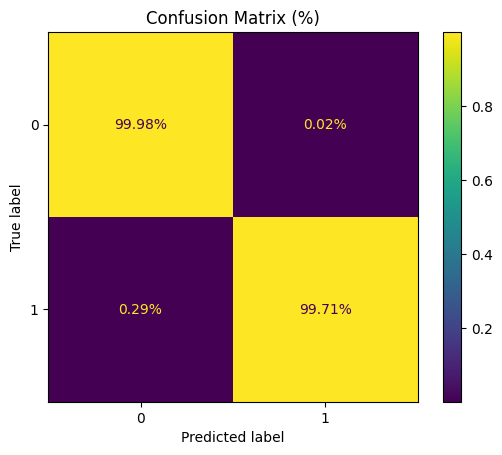

In [71]:
cm = confusion_matrix(y_train_5, y_pred_train)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

In [72]:
# classification_rep = classification_report(y_test_5, y_pred)
# print("Classification Report:")
# print(classification_rep)

##### y_pred

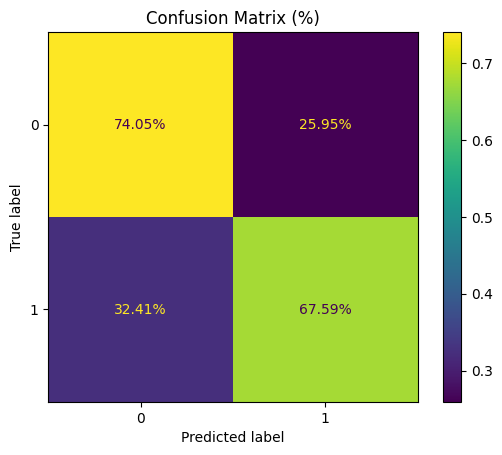

In [73]:
cm = confusion_matrix(y_test_5, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

### predict proba

In [74]:
y_pred = best_model.predict_proba(X_test_5)
y_pred_train = best_model.predict_proba(X_train_5)

In [75]:
results_test = y_test_5\
.reset_index(drop=False)\
.merge(pd.DataFrame(y_pred[:,1]), how = 'inner', left_index=True, right_index =True)\
.drop(columns = {'index'})\
.rename(columns = {0:'predicted'})

In [76]:
display(results_test.query('Churn ==0')[['predicted']].describe())
print('\n')
display(results_test.query('Churn ==1')[['predicted']].describe())

,predicted
count,1048.000000
mean,0.258586
std,0.358674
min,0.000000
25%,0.000000
50%,0.000000
75%,0.553141
max,1.000000


,predicted
count,361.000000
mean,0.638839
std,0.363776
min,0.000000
25%,0.322061
50%,0.667439
75%,1.000000
max,1.000000


In [77]:
results_test['predicted_03'] = (results_test['predicted'] >= 0.30).astype(int)
results_test['predicted_05'] = (results_test['predicted'] >= 0.50).astype(int)

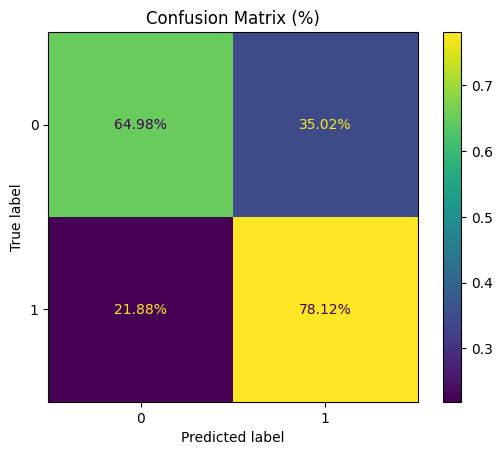

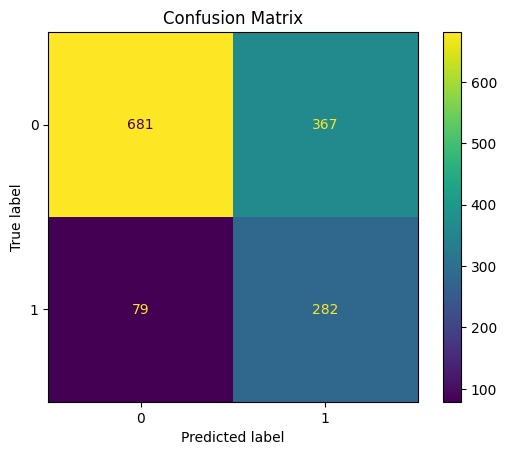

In [78]:
cm = confusion_matrix(results_test['Churn'], results_test['predicted_03'])

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

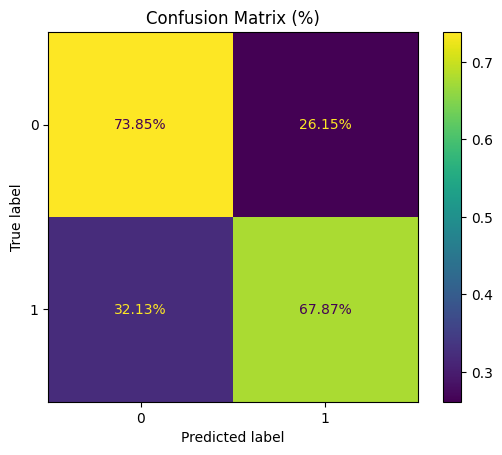

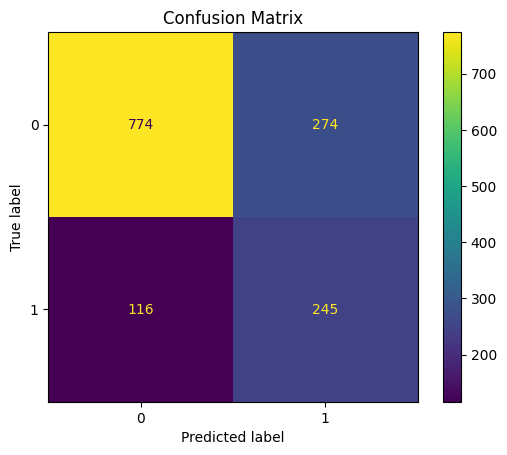

In [79]:
cm = confusion_matrix(results_test['Churn'], results_test['predicted_05'])

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

# voting classifer

rf

In [80]:
best_rf_params

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 150}

In [81]:
best_rf_df_version

'v5'

lr

In [82]:
best_lr_params

{'C': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

In [83]:
best_lr_df_version

'v2'

knn

In [84]:
best_knn_params

{'algorithm': 'kd_tree',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [85]:
best_knn_df_version

'v5'

In [86]:
rf_classifier = RandomForestClassifier(random_state=13, **best_rf_params)
lr_classifier = LogisticRegression(random_state=13, **best_lr_params)
knn_classifier = KNeighborsClassifier(**best_knn_params)

#### vot_clf

v2

In [87]:
vot_clf = VotingClassifier(estimators=[('rf', rf_classifier), ('lr', lr_classifier), ('knn', knn_classifier)],
                            voting='soft', n_jobs=-1)

In [88]:
type(vot_clf)

sklearn.ensemble._voting.VotingClassifier

##### fit

In [89]:
vot_clf.fit(X_train_2, y_train_2)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=13)),
                             ('lr',
                              LogisticRegression(C=0.5, max_iter=500,
                                                 random_state=13,
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=10, n_neighbors=3,
                                                   p=1, weights='distance'))],
                 n_jobs=-1, voting='soft')

##### y_pred

In [90]:
y_pred_2 = vot_clf.predict(X_test_2)

In [91]:
np.bincount(y_pred_2)

array([895, 514])

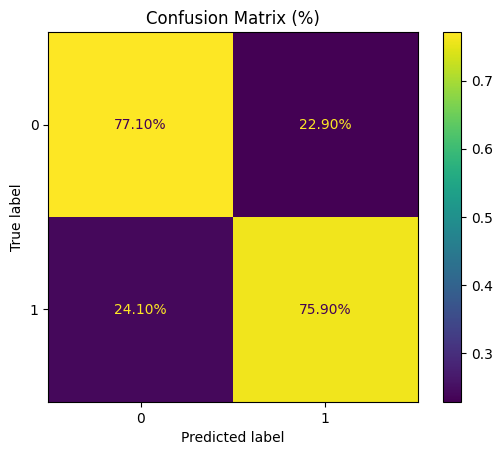

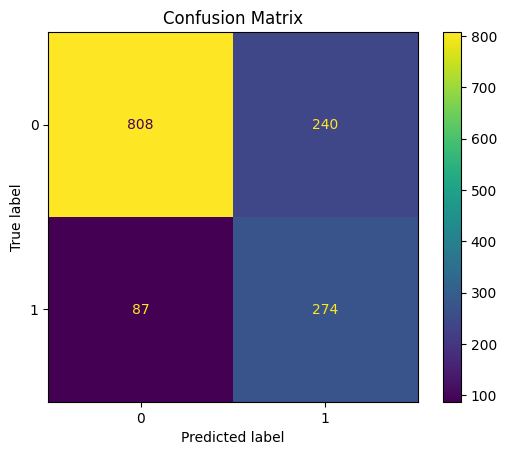

In [92]:
cm = confusion_matrix(y_test_2, y_pred_2)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

##### y_pred by model

In [93]:
rf_classifier.fit(X_train_2, y_train_2)
lr_classifier.fit(X_train_2, y_train_2)
knn_classifier.fit(X_train_2, y_train_2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=3, p=1,
                     weights='distance')

In [94]:
y_pred_rf_2 = rf_classifier.predict(X_test_2)
y_pred_lr_2 = lr_classifier.predict(X_test_2)
y_pred_knn_2 = knn_classifier.predict(X_test_2)

##### voting results

In [95]:
voting_results_2 = pd.DataFrame({
    'RF Predictions': y_pred_rf_2,
    'LR Predictions': y_pred_lr_2,
    'KNN Predictions': y_pred_knn_2,
    'True Labels': y_test_2
})

voting_results_2

,RF Predictions,LR Predictions,KNN Predictions,True Labels
416,0,0,0,0
4521,0,0,0,0
4213,1,1,1,1
1580,0,0,0,0
2226,0,0,0,0
...,...,...,...,...
2937,0,0,0,0
2353,1,1,1,0
4851,1,1,1,1
301,1,1,1,1


##### voting_results + X_test merge

In [96]:
df_analysis_2 = X_test_2.merge(voting_results_2, how ='inner', left_index = True, right_index =True)

In [97]:
df_analysis_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MeanMonthlyCharges,MeanMonthlyCharges_MonthlyCharges_Diff,RF Predictions,LR Predictions,KNN Predictions,True Labels
416,0,0,1,0,1.532261,1,1,1.078557,0,1,1,1,0,1,2,1,-0.733687,1.127972,2.020250,1.099693,-0.203089,0,0,0,0
4521,1,0,1,0,0.554972,0,0,-0.532254,1,1,0,0,1,0,0,0,1.399743,-0.638519,-0.095994,-0.656420,-0.204627,0,0,0,0
4213,1,0,0,0,-1.073843,1,0,-0.532254,0,0,0,1,0,0,0,1,-0.733687,-0.464030,-0.878697,-0.551394,-0.849484,1,1,1,1
1580,1,1,1,0,-0.463037,1,1,-0.532254,0,1,1,0,0,1,1,0,-0.733687,0.230601,-0.345307,0.217714,-0.108491,0,0,0,0
2226,1,0,1,1,-0.381597,0,0,-0.532254,1,0,0,1,0,0,2,0,-0.554739,-1.002452,-0.646900,-0.969021,0.258709,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,1,0,1,1,1.287938,1,1,1.078557,0,1,1,0,0,1,1,1,1.399743,0.933541,1.632825,0.949865,0.206345,0,0,0,0
2353,0,0,0,0,-1.196004,1,0,1.078557,0,0,0,0,0,1,0,1,1.399743,0.518092,-0.893808,0.657508,1.343098,1,1,1,0
4851,1,1,0,0,-1.196004,1,0,1.078557,0,0,0,0,0,0,0,1,1.399743,0.187394,-0.915470,0.116792,-0.654876,1,1,1,1
301,1,1,0,0,-1.155283,1,1,1.078557,0,0,0,0,1,1,0,1,1.399743,1.019955,-0.831027,1.134075,1.132921,1,1,1,1


tenure

In [98]:
print(f1_score(df_analysis_2.query('tenure > 0')['True Labels'], df_analysis_2.query('tenure > 0')['RF Predictions'],))
print(f1_score(df_analysis_2.query('tenure < 0')['True Labels'], df_analysis_2.query('tenure < 0')['RF Predictions'],))

0.4031007751937984
0.6731571627260083


In [99]:
print(f1_score(df_analysis_2.query('tenure > 0')['True Labels'], df_analysis_2.query('tenure > 0')['LR Predictions'],))
print(f1_score(df_analysis_2.query('tenure < 0')['True Labels'], df_analysis_2.query('tenure < 0')['LR Predictions'],))

0.4625850340136054
0.6577181208053692


In [100]:
print(f1_score(df_analysis_2.query('tenure > 0')['True Labels'], df_analysis_2.query('tenure > 0')['KNN Predictions'],))
print(f1_score(df_analysis_2.query('tenure < 0')['True Labels'], df_analysis_2.query('tenure < 0')['KNN Predictions'],))

0.37894736842105264
0.6028571428571429


mean values of variables comparison

In [101]:
(df_analysis_2[df_analysis_2['True Labels']!=df_analysis_2['RF Predictions']].mean() - df_analysis_2[df_analysis_2['True Labels']==df_analysis_2['RF Predictions']].mean()).sort_values()

,0
Contract,-0.706799
tenure,-0.577424
TotalCharges,-0.279646
Partner,-0.180708
Dependents,-0.160502
TechSupport,-0.121304
OnlineSecurity,-0.094839
DeviceProtection,-0.069817
OnlineBackup,-0.061055
MultipleLines,-0.058969


In [102]:
(df_analysis_2[df_analysis_2['True Labels']!=df_analysis_2['LR Predictions']].mean() - df_analysis_2[df_analysis_2['True Labels']==df_analysis_2['LR Predictions']].mean()).sort_values()

,0
Contract,-0.708787
tenure,-0.564237
TotalCharges,-0.268477
Dependents,-0.183760
Partner,-0.171678
OnlineSecurity,-0.117307
TechSupport,-0.104517
DeviceProtection,-0.064203
MultipleLines,-0.063974
OnlineBackup,-0.061122


In [103]:
(df_analysis_2[df_analysis_2['True Labels']!=df_analysis_2['KNN Predictions']].mean() - df_analysis_2[df_analysis_2['True Labels']==df_analysis_2['KNN Predictions']].mean()).sort_values()

,0
Contract,-0.606539
tenure,-0.454310
TotalCharges,-0.170047
Partner,-0.162730
Dependents,-0.147873
TechSupport,-0.084350
OnlineSecurity,-0.071632
MultipleLines,-0.058320
OnlineBackup,-0.050582
DeviceProtection,-0.039402


#### vot_clf on 2 datasets

##### dividing datasets

In [104]:
min_tenure = df_analysis_2['tenure'].min()
max_tenure = df_analysis_2['tenure'].max()

num_thresholds = 100
thresholds = np.linspace(min_tenure + 0.5, max_tenure - 0.5, num=num_thresholds)

f1_scores_short = []
f1_scores_long = []

for threshold in thresholds:
    short_tenure = df_analysis_2[df_analysis_2['tenure'] <= threshold]
    long_tenure = df_analysis_2[df_analysis_2['tenure'] > threshold]

    f1_short = f1_score(short_tenure['True Labels'], short_tenure['RF Predictions'])
    f1_long = f1_score(long_tenure['True Labels'], long_tenure['RF Predictions'])

    f1_scores_short.append(f1_short)
    f1_scores_long.append(f1_long)

optimal_threshold_index = np.argmax(np.array(f1_scores_long) - np.array(f1_scores_short))
optimal_threshold = thresholds[optimal_threshold_index]
rf_optimal_threshold = optimal_threshold

print("Optimal tenure threshold:", rf_optimal_threshold)
print("F1 Score for short tenure:", f1_scores_short[optimal_threshold_index])
print("F1 Score for long tenure:", f1_scores_long[optimal_threshold_index])
print("Number of elements in the group for short tenure:", len(short_tenure), f"({len(short_tenure) / (len(short_tenure + long_tenure)) * 100 :.2f}%)")
print("Number of elements in the group for short tenure:", len(long_tenure), f"({len(long_tenure) / (len(short_tenure + long_tenure)) * 100 :.2f}%)")

Optimal tenure threshold: -0.5839993488724704
F1 Score for short tenure: 0.686106346483705
F1 Score for long tenure: 0.5132075471698113
Number of elements in the group for short tenure: 1121 (79.56%)
Number of elements in the group for short tenure: 288 (20.44%)


In [105]:
min_tenure = df_analysis_2['tenure'].min()
max_tenure = df_analysis_2['tenure'].max()

num_thresholds = 100
thresholds = np.linspace(min_tenure + 0.5, max_tenure - 0.5, num=num_thresholds)

f1_scores_short = []
f1_scores_long = []

for threshold in thresholds:
    short_tenure = df_analysis_2[df_analysis_2['tenure'] <= threshold]
    long_tenure = df_analysis_2[df_analysis_2['tenure'] > threshold]

    f1_short = f1_score(short_tenure['True Labels'], short_tenure['LR Predictions'])
    f1_long = f1_score(long_tenure['True Labels'], long_tenure['LR Predictions'])

    f1_scores_short.append(f1_short)
    f1_scores_long.append(f1_long)

optimal_threshold_index = np.argmax(np.array(f1_scores_long) - np.array(f1_scores_short))
optimal_threshold = thresholds[optimal_threshold_index]
lr_optimal_threshold = optimal_threshold

print("Optimal tenure threshold:", lr_optimal_threshold)
print("F1 Score for short tenure:", f1_scores_short[optimal_threshold_index])
print("F1 Score for long tenure:", f1_scores_long[optimal_threshold_index])
print("Number of elements in the group for short tenure:", len(short_tenure), f"({len(short_tenure) / (len(short_tenure + long_tenure)) * 100 :.2f}%)")
print("Number of elements in the group for short tenure:", len(long_tenure), f"({len(long_tenure) / (len(short_tenure + long_tenure)) * 100 :.2f}%)")

Optimal tenure threshold: -0.5839993488724704
F1 Score for short tenure: 0.65993265993266
F1 Score for long tenure: 0.5570469798657719
Number of elements in the group for short tenure: 1121 (79.56%)
Number of elements in the group for short tenure: 288 (20.44%)


In [108]:
min_tenure = df_analysis_2['tenure'].min()
max_tenure = df_analysis_2['tenure'].max()

num_thresholds = 100
thresholds = np.linspace(min_tenure + 0.5, max_tenure - 0.5, num=num_thresholds)

f1_scores_short = []
f1_scores_long = []

for threshold in thresholds:
    short_tenure = df_analysis_2[df_analysis_2['tenure'] <= threshold]
    long_tenure = df_analysis_2[df_analysis_2['tenure'] > threshold]

    f1_short = f1_score(short_tenure['True Labels'], short_tenure['KNN Predictions'])
    f1_long = f1_score(long_tenure['True Labels'], long_tenure['KNN Predictions'])

    f1_scores_short.append(f1_short)
    f1_scores_long.append(f1_long)

optimal_threshold_index = np.argmax(np.array(f1_scores_long) - np.array(f1_scores_short))
optimal_threshold = thresholds[optimal_threshold_index]
knn_optimal_threshold = optimal_threshold

print("Optimal tenure threshold:", knn_optimal_threshold)
print("F1 Score for short tenure:", f1_scores_short[optimal_threshold_index])
print("F1 Score for long tenure:", f1_scores_long[optimal_threshold_index])
print("Number of elements in the group for short tenure:", len(short_tenure), f"({len(short_tenure) / (len(short_tenure + long_tenure)) * 100 :.2f}%)")
print("Number of elements in the group for short tenure:", len(long_tenure), f"({len(long_tenure) / (len(short_tenure + long_tenure)) * 100 :.2f}%)")

Optimal tenure threshold: -0.818164947398796
F1 Score for short tenure: 0.6302521008403361
F1 Score for long tenure: 0.46859903381642515
Number of elements in the group for short tenure: 1121 (79.56%)
Number of elements in the group for short tenure: 288 (20.44%)


In [109]:
print(f1_score(df_analysis_2.query(f'tenure > {rf_optimal_threshold}')['True Labels'], df_analysis_2.query(f'tenure > {rf_optimal_threshold}')['KNN Predictions']))
print(f1_score(df_analysis_2.query(f'tenure <= {rf_optimal_threshold}')['True Labels'], df_analysis_2.query(f'tenure <= {rf_optimal_threshold}')['KNN Predictions']))

0.4510385756676558
0.6184448462929475


X_trian_2_1, X_train_2_2

In [110]:
X_train_2_1 = X_train_2[X_train_2['tenure'] <= rf_optimal_threshold]
y_train_2_1 = y_train_2[X_train_2['tenure'] <= rf_optimal_threshold]

X_train_2_2 = X_train_2[X_train_2['tenure'] > rf_optimal_threshold]
y_train_2_2 = y_train_2[X_train_2['tenure'] > rf_optimal_threshold]

X_test_2_1, X_test_2_2

In [111]:
X_test_2_1 = X_test_2[X_test_2['tenure'] <= rf_optimal_threshold]
y_test_2_1 = y_test_2[X_test_2['tenure'] <= rf_optimal_threshold]

X_test_2_2 = X_test_2[X_test_2['tenure'] > rf_optimal_threshold]
y_test_2_2 = y_test_2[X_test_2['tenure'] > rf_optimal_threshold]

##### vot_clf 2_1

###### fit

In [112]:
vot_clf.fit(X_train_2_1, y_train_2_1)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=13)),
                             ('lr',
                              LogisticRegression(C=0.5, max_iter=500,
                                                 random_state=13,
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=10, n_neighbors=3,
                                                   p=1, weights='distance'))],
                 n_jobs=-1, voting='soft')

###### y_pred

In [113]:
y_pred_2_1 = vot_clf.predict(X_test_2_1)

In [114]:
np.bincount(y_pred_2_1)

array([219, 348])

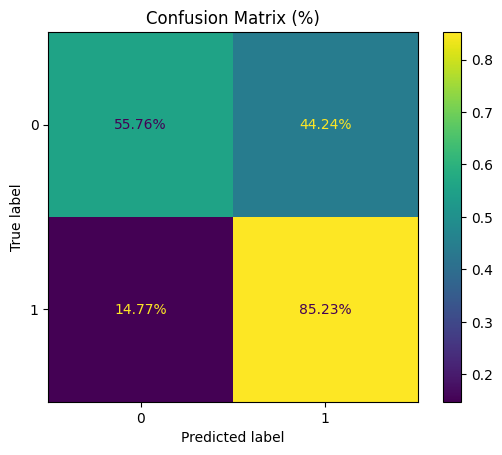

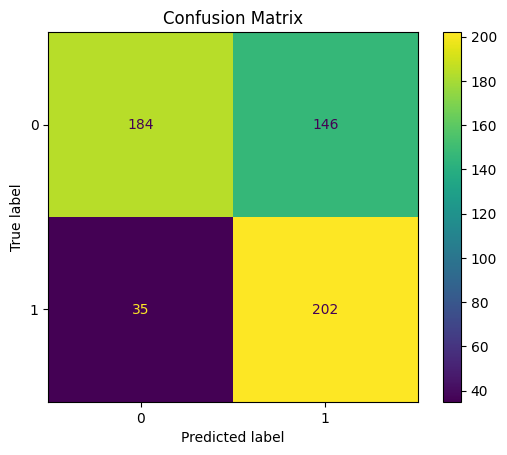

In [115]:
cm = confusion_matrix(y_test_2_1, y_pred_2_1)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

###### y_pred by model

In [116]:
rf_classifier.fit(X_train_2_1, y_train_2_1)
lr_classifier.fit(X_train_2_1, y_train_2_1)
knn_classifier.fit(X_train_2_1, y_train_2_1)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=3, p=1,
                     weights='distance')

In [117]:
y_pred_rf_2_1 = rf_classifier.predict(X_test_2_1)
y_pred_lr_2_1 = lr_classifier.predict(X_test_2_1)
y_pred_knn_2_1 = knn_classifier.predict(X_test_2_1)

###### voting results

In [118]:
voting_results_2_1 = pd.DataFrame({
    'RF Predictions': y_pred_rf_2_1,
    'LR Predictions': y_pred_lr_2_1,
    'KNN Predictions': y_pred_knn_2_1,
    'True Labels': y_test_2_1
})

voting_results_2_1

,RF Predictions,LR Predictions,KNN Predictions,True Labels
4213,1,1,1,1
1627,1,1,1,0
1070,1,1,1,1
1755,0,0,1,0
6109,1,1,1,0
...,...,...,...,...
4499,0,1,1,1
5144,1,1,1,0
2353,1,1,1,0
4851,1,1,1,1


###### voting results by model comparison

In [119]:
df_analysis_2_1 = X_test_2_1.merge(voting_results_2_1, how ='inner', left_index = True, right_index =True)

In [120]:
(df_analysis_2_1[df_analysis_2_1['True Labels']!=df_analysis_2_1['RF Predictions']].mean() - df_analysis_2_1[df_analysis_2_1['True Labels']==df_analysis_2_1['RF Predictions']].mean()).sort_values()

,0
True Labels,-0.294006
Contract,-0.190712
Partner,-0.091271
Dependents,-0.074041
MultipleLines,-0.058166
PhoneService,-0.048429
SeniorCitizen,-0.018076
OnlineBackup,-0.014182
tenure,-0.010117
TechSupport,0.008424


In [121]:
(df_analysis_2_1[df_analysis_2_1['True Labels']!=df_analysis_2_1['LR Predictions']].mean() - df_analysis_2_1[df_analysis_2_1['True Labels']==df_analysis_2_1['LR Predictions']].mean()).sort_values()

,0
True Labels,-0.353988
Contract,-0.210524
Dependents,-0.122354
Partner,-0.070667
PhoneService,-0.066392
MultipleLines,-0.059109
OnlineBackup,-0.013479
gender,-0.003036
tenure,0.002119
StreamingTV,0.014690


In [122]:
(df_analysis_2_1[df_analysis_2_1['True Labels']!=df_analysis_2_1['KNN Predictions']].mean() - df_analysis_2_1[df_analysis_2_1['True Labels']==df_analysis_2_1['KNN Predictions']].mean()).sort_values()

,0
True Labels,-0.192971
Contract,-0.181916
Dependents,-0.080760
MultipleLines,-0.079843
Partner,-0.048459
PhoneService,-0.035450
TechSupport,-0.024821
tenure,-0.011567
SeniorCitizen,0.001581
PaymentMethod,0.004122


##### vot_clf 2_2

###### fit

In [123]:
vot_clf.fit(X_train_2_2, y_train_2_2)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=13)),
                             ('lr',
                              LogisticRegression(C=0.5, max_iter=500,
                                                 random_state=13,
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=10, n_neighbors=3,
                                                   p=1, weights='distance'))],
                 n_jobs=-1, voting='soft')

###### y_pred

In [124]:
y_pred_2_2 = vot_clf.predict(X_test_2_2)

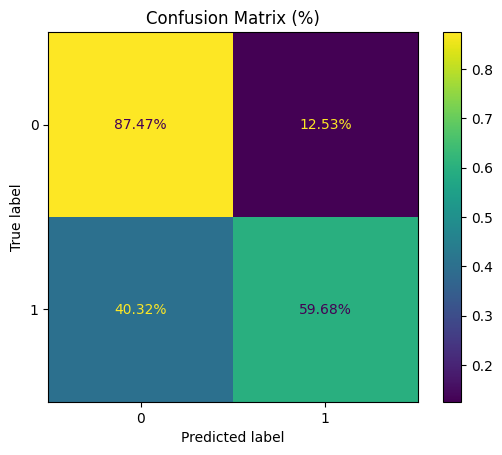

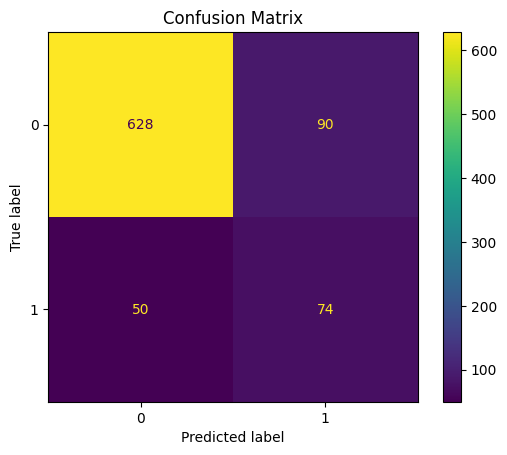

In [125]:
cm = confusion_matrix(y_test_2_2, y_pred_2_2)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

###### y_pred by model

In [126]:
rf_classifier.fit(X_train_2_2, y_train_2_2)
lr_classifier.fit(X_train_2_2, y_train_2_2)
knn_classifier.fit(X_train_2_2, y_train_2_2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=3, p=1,
                     weights='distance')

In [127]:
y_pred_rf_2_2 = rf_classifier.predict(X_test_2_2)
y_pred_lr_2_2 = lr_classifier.predict(X_test_2_2)
y_pred_knn_2_2 = knn_classifier.predict(X_test_2_2)

###### voting results

In [128]:
voting_results_2_2 = pd.DataFrame({
    'RF Predictions': y_pred_rf_2_2,
    'LR Predictions': y_pred_lr_2_2,
    'KNN Predictions': y_pred_knn_2_2,
    'True Labels': y_test_2_2
})

voting_results_2_2

,RF Predictions,LR Predictions,KNN Predictions,True Labels
416,0,0,0,0
4521,0,0,0,0
1580,0,0,0,0
2226,0,0,0,0
2273,0,0,0,0
...,...,...,...,...
3910,1,1,1,1
540,0,0,0,0
296,0,0,1,0
2937,0,0,0,0


###### voting results by model comparison

In [129]:
df_analysis_2_2 = X_test_2_2.merge(voting_results_2_2, how ='inner', left_index = True, right_index =True)

In [130]:
(df_analysis_2_2[df_analysis_2_2['True Labels']!=df_analysis_2_2['RF Predictions']].mean() - df_analysis_2_2[df_analysis_2_2['True Labels']==df_analysis_2_2['RF Predictions']].mean()).sort_values()

,0
Contract,-0.901383
tenure,-0.384744
Dependents,-0.180618
OnlineSecurity,-0.147040
TechSupport,-0.124762
Partner,-0.120851
MeanMonthlyCharges_MonthlyCharges_Diff,-0.073507
DeviceProtection,-0.013051
PhoneService,-0.012857
OnlineBackup,0.016249


In [131]:
(df_analysis_2_2[df_analysis_2_2['True Labels']!=df_analysis_2_2['LR Predictions']].mean() - df_analysis_2_2[df_analysis_2_2['True Labels']==df_analysis_2_2['LR Predictions']].mean()).sort_values()

,0
Contract,-0.877250
tenure,-0.287307
Dependents,-0.200142
OnlineSecurity,-0.184269
TechSupport,-0.160393
Partner,-0.119602
gender,-0.023876
PhoneService,-0.017092
DeviceProtection,-0.006229
MeanMonthlyCharges_MonthlyCharges_Diff,-0.004156


In [132]:
(df_analysis_2_2[df_analysis_2_2['True Labels']!=df_analysis_2_2['KNN Predictions']].mean() - df_analysis_2_2[df_analysis_2_2['True Labels']==df_analysis_2_2['KNN Predictions']].mean()).sort_values()

,0
Contract,-0.722249
tenure,-0.313172
Partner,-0.158224
Dependents,-0.152808
gender,-0.074403
OnlineSecurity,-0.073687
TechSupport,-0.060918
DeviceProtection,-0.034648
MeanMonthlyCharges_MonthlyCharges_Diff,-0.006853
PhoneService,0.004441


##### vot_clf 5_1

X_trian_5_1, X_train_5_2

In [133]:
X_train_5_1 = X_train_5[X_train_5['tenure'] <= rf_optimal_threshold]
y_train_5_1 = y_train_5[X_train_5['tenure'] <= rf_optimal_threshold]

X_train_5_2 = X_train_5[X_train_5['tenure'] > rf_optimal_threshold]
y_train_5_2 = y_train_5[X_train_5['tenure'] > rf_optimal_threshold]

X_test_5_1, X_test_5_2

In [134]:
X_test_5_1 = X_test_5[X_test_5['tenure'] <= rf_optimal_threshold]
y_test_5_1 = y_test_5[X_test_5['tenure'] <= rf_optimal_threshold]

X_test_5_2 = X_test_5[X_test_5['tenure'] > rf_optimal_threshold]
y_test_5_2 = y_test_5[X_test_5['tenure'] > rf_optimal_threshold]

###### fit

In [135]:
vot_clf.fit(X_train_5_1, y_train_5_1)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=13)),
                             ('lr',
                              LogisticRegression(C=0.5, max_iter=500,
                                                 random_state=13,
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=10, n_neighbors=3,
                                                   p=1, weights='distance'))],
                 n_jobs=-1, voting='soft')

###### y_pred

In [136]:
y_pred_5_1 = vot_clf.predict(X_test_5_1)

In [137]:
np.bincount(y_pred_5_1)

array([225, 342])

In [138]:
classification_rep = classification_report(y_test_5_1, y_pred_5_1)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.56      0.66       330
           1       0.57      0.83      0.68       237

    accuracy                           0.67       567
   macro avg       0.70      0.69      0.67       567
weighted avg       0.72      0.67      0.67       567



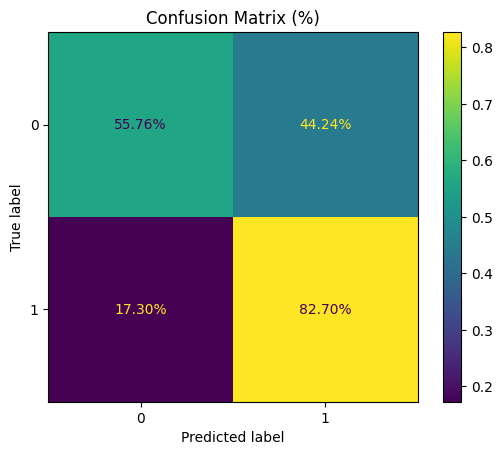

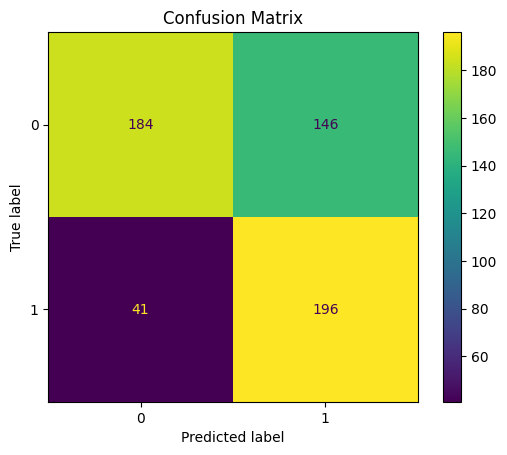

In [139]:
cm = confusion_matrix(y_test_5_1, y_pred_5_1)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

###### y_pred by model

In [140]:
rf_classifier.fit(X_train_5_1, y_train_5_1)
lr_classifier.fit(X_train_5_1, y_train_5_1)
knn_classifier.fit(X_train_5_1, y_train_5_1)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=3, p=1,
                     weights='distance')

In [141]:
y_pred_rf_5_1 = rf_classifier.predict(X_test_5_1)
y_pred_lr_5_1 = lr_classifier.predict(X_test_5_1)
y_pred_knn_5_1 = knn_classifier.predict(X_test_5_1)

###### voting results

In [142]:
voting_results_5_1 = pd.DataFrame({
    'RF Predictions': y_pred_rf_5_1,
    'LR Predictions': y_pred_lr_5_1,
    'KNN Predictions': y_pred_knn_5_1,
    'True Labels': y_test_5_1
})

voting_results_5_1

,RF Predictions,LR Predictions,KNN Predictions,True Labels
4213,1,1,1,1
1627,1,1,0,0
1070,1,1,1,1
1755,0,0,1,0
6109,1,1,1,0
...,...,...,...,...
4499,1,1,1,1
5144,1,1,1,0
2353,1,1,1,0
4851,1,1,1,1


###### voting results by model comparison

In [143]:
df_analysis_5_1 = X_test_5_1.merge(voting_results_5_1, how ='inner', left_index = True, right_index =True)

In [144]:
(df_analysis_5_1[df_analysis_5_1['True Labels']!=df_analysis_5_1['RF Predictions']].mean() - df_analysis_5_1[df_analysis_5_1['True Labels']==df_analysis_5_1['RF Predictions']].mean()).sort_values()

,0
True Labels,-0.273980
PCA1,-0.178676
PCA7,-0.047664
PCA6,-0.040990
tenure,0.000179
PCA4,0.019992
TotalCharges,0.037830
PCA5,0.043025
MeanMonthlyCharges_MonthlyCharges_Diff,0.069608
PaymentMethod,0.086670


In [145]:
(df_analysis_5_1[df_analysis_5_1['True Labels']!=df_analysis_5_1['LR Predictions']].mean() - df_analysis_5_1[df_analysis_5_1['True Labels']==df_analysis_5_1['LR Predictions']].mean()).sort_values()

,0
True Labels,-0.496396
PCA1,-0.200009
PCA4,-0.043935
PCA7,-0.027639
PCA6,-0.023985
tenure,-0.012878
PaymentMethod,0.004892
TotalCharges,0.022803
InternetService,0.045206
MonthlyCharges,0.046153


In [146]:
(df_analysis_5_1[df_analysis_5_1['True Labels']!=df_analysis_5_1['KNN Predictions']].mean() - df_analysis_5_1[df_analysis_5_1['True Labels']==df_analysis_5_1['KNN Predictions']].mean()).sort_values()

,0
True Labels,-0.180212
PCA1,-0.158461
PCA7,-0.051420
tenure,-0.020979
PCA6,-0.019552
PCA4,0.003892
TotalCharges,0.015543
PCA3,0.016990
PCA5,0.033614
InternetService,0.097633


##### vot_clf_5_2

###### fit

In [147]:
vot_clf.fit(X_train_5_2, y_train_5_2)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=13)),
                             ('lr',
                              LogisticRegression(C=0.5, max_iter=500,
                                                 random_state=13,
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=10, n_neighbors=3,
                                                   p=1, weights='distance'))],
                 n_jobs=-1, voting='soft')

###### y_pred

In [148]:
y_pred_5_2 = vot_clf.predict(X_test_5_2)

In [149]:
np.bincount(y_pred_5_2)

array([688, 154])

In [150]:
classification_rep = classification_report(y_test_5_2, y_pred_5_2)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       718
           1       0.45      0.56      0.50       124

    accuracy                           0.84       842
   macro avg       0.69      0.72      0.70       842
weighted avg       0.85      0.84      0.84       842



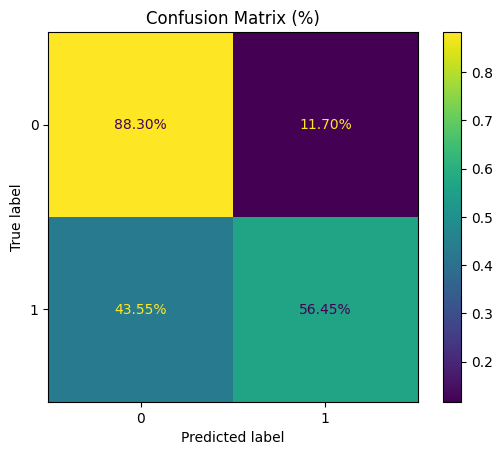

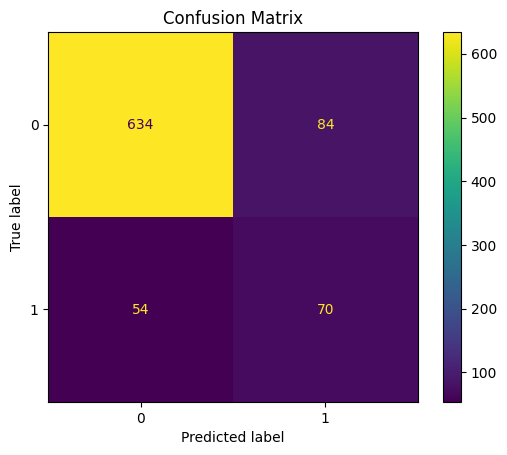

In [151]:
cm = confusion_matrix(y_test_5_2, y_pred_5_2)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
cmd.plot(values_format='.2%')
plt.title('Confusion Matrix (%)')
plt.show()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

###### y_pred by model

In [152]:
rf_classifier.fit(X_train_5_2, y_train_5_2)
lr_classifier.fit(X_train_5_2, y_train_5_2)
knn_classifier.fit(X_train_5_2, y_train_5_2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=3, p=1,
                     weights='distance')

In [153]:
y_pred_rf_5_2 = rf_classifier.predict(X_test_5_2)
y_pred_lr_5_2 = lr_classifier.predict(X_test_5_2)
y_pred_knn_5_2 = knn_classifier.predict(X_test_5_2)

###### voting results

In [154]:
voting_results_5_2 = pd.DataFrame({
    'RF Predictions': y_pred_rf_5_2,
    'LR Predictions': y_pred_lr_5_2,
    'KNN Predictions': y_pred_knn_5_2,
    'True Labels': y_test_5_2
})

voting_results_5_2

,RF Predictions,LR Predictions,KNN Predictions,True Labels
416,0,0,0,0
4521,0,0,0,0
1580,0,0,0,0
2226,0,0,0,0
2273,0,0,0,0
...,...,...,...,...
3910,1,1,1,1
540,0,0,0,0
296,0,0,1,0
2937,0,0,0,0


###### voting results by model comparison

In [155]:
df_analysis_5_2 = X_test_5_2.merge(voting_results_5_2, how ='inner', left_index = True, right_index =True)

In [156]:
(df_analysis_5_2[df_analysis_5_2['True Labels']!=df_analysis_5_2['RF Predictions']].mean() - df_analysis_5_2[df_analysis_5_2['True Labels']==df_analysis_5_2['RF Predictions']].mean()).sort_values()

,0
PCA1,-0.634408
tenure,-0.360458
PCA3,-0.142835
PCA6,-0.114432
MeanMonthlyCharges_MonthlyCharges_Diff,-0.049985
PCA5,-0.048614
PCA4,-0.038736
PCA7,0.085996
TotalCharges,0.109144
True Labels,0.342262


In [157]:
(df_analysis_5_2[df_analysis_5_2['True Labels']!=df_analysis_5_2['LR Predictions']].mean() - df_analysis_5_2[df_analysis_5_2['True Labels']==df_analysis_5_2['LR Predictions']].mean()).sort_values()

,0
PCA1,-0.687383
tenure,-0.363327
MeanMonthlyCharges_MonthlyCharges_Diff,-0.139387
PCA3,-0.134240
PCA6,-0.020859
PCA5,-0.019945
PCA4,-0.007778
PCA7,0.058372
TotalCharges,0.122949
True Labels,0.170988


In [158]:
(df_analysis_5_2[df_analysis_5_2['True Labels']!=df_analysis_5_2['KNN Predictions']].mean() - df_analysis_5_2[df_analysis_5_2['True Labels']==df_analysis_5_2['KNN Predictions']].mean()).sort_values()

,0
PCA1,-0.555239
tenure,-0.285298
MeanMonthlyCharges_MonthlyCharges_Diff,-0.070440
PCA3,-0.064502
PCA6,-0.046708
PCA4,-0.033463
PCA7,0.017735
PCA5,0.020042
TotalCharges,0.093650
True Labels,0.197652


# k-means

### elbow curve



In [174]:
X_2 = X_train_2

In [175]:
inertia = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=13)
    kmeans.fit(X_2)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

In [176]:
inertia

[87430.62787934227,
 61401.24276898915,
 47774.165231588406,
 44168.71613673238,
 41175.903439122165,
 38802.277392026015,
 36398.42877584137,
 34640.59226170119,
 33294.48388576568,
 31823.241226928574]

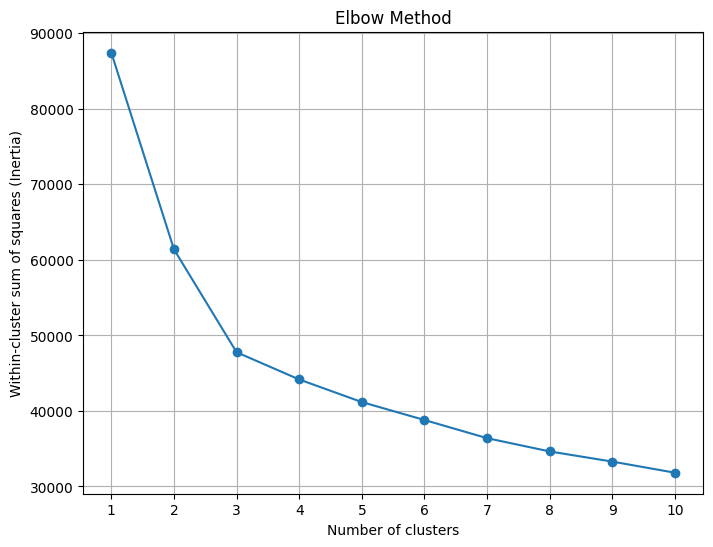

In [177]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### model

In [178]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=13)

In [179]:
kmeans.fit(X_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=13)

In [180]:
clusters = kmeans.predict(X_2)
X_train_2['Cluster'] = clusters

In [181]:
X_2['Cluster'].value_counts()

,count
Cluster,
0,3146
1,3058
2,2048


In [182]:
clusters

array([1, 0, 2, ..., 1, 1, 1], dtype=int32)

In [183]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=X_2.columns))

Cluster Centers:
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0  0.452956       0.073427  0.352193    0.285442 -0.416740      0.785124   
1  0.486920       0.241988  0.277305    0.108241 -0.771616      0.999019   
2  0.477051       0.190430  0.674805    0.325684  1.016823      0.956543   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.148760        -0.883905        0.167832      0.150032   
1       0.481033         1.003239        0.094506      0.203074   
2       0.713379         0.548430        0.508789      0.656738   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0          0.128099     0.146217     0.104577         0.113160  0.572791   
1          0.221714     0.105298     0.418574         0.425441  0.027469   
2          0.683594     0.522461     0.746094         0.750488  1.122559   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  \
0          0.433884      -0.208381  

### metrics

In [186]:
labels = kmeans.labels_

silhouette = silhouette_score(X_2, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.27423489950405683


## cluster vizualization

### PCA

In [187]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_2)

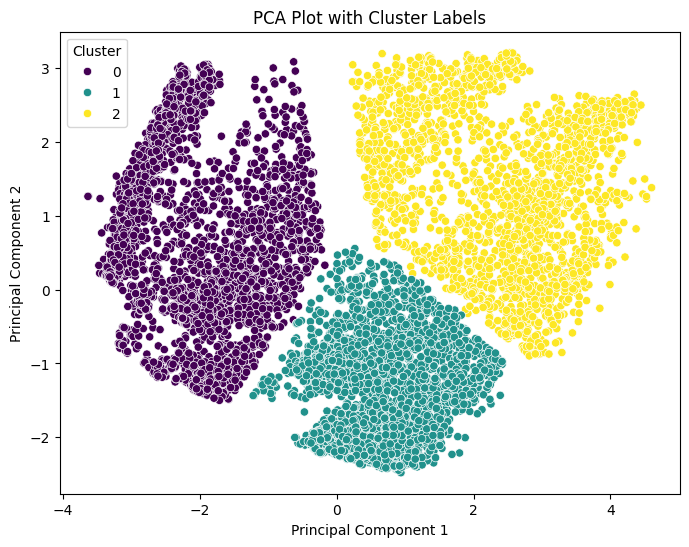

In [188]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis")

plt.title("PCA Plot with Cluster Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

### 3D chart

In [189]:
fig = px.scatter_3d(
    X_2,
    x='MonthlyCharges',
    y='TotalCharges',
    z='tenure',
    color='Cluster',
    symbol='gender',
    title='K-means Clustering in 3D with Gender Markers',
    width=800,
    height=600,
)


fig.update_layout(legend=dict(orientation="h"))

In [190]:
cluster_means = X_2.groupby(clusters).mean()
print("Mean values for each cluster:")
print(cluster_means)

Mean values for each cluster:
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0  0.452956       0.073427  0.352193    0.285442 -0.416740      0.785124   
1  0.486920       0.241988  0.277305    0.108241 -0.771616      0.999019   
2  0.477051       0.190430  0.674805    0.325684  1.016823      0.956543   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.148760        -0.883905        0.167832      0.150032   
1       0.481033         1.003239        0.094506      0.203074   
2       0.713379         0.548430        0.508789      0.656738   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0          0.128099     0.146217     0.104577         0.113160  0.572791   
1          0.221714     0.105298     0.418574         0.425441  0.027469   
2          0.683594     0.522461     0.746094         0.750488  1.122559   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  \
0          0.433884    

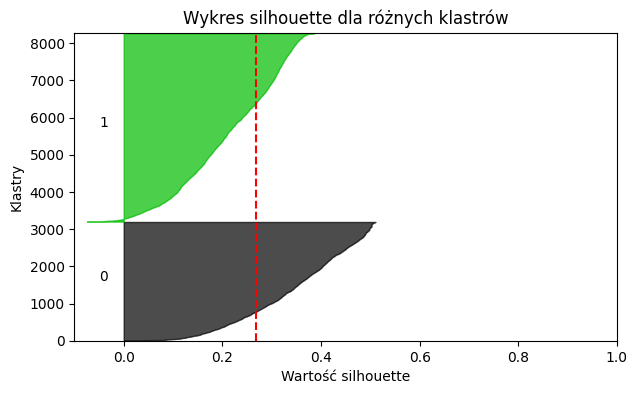

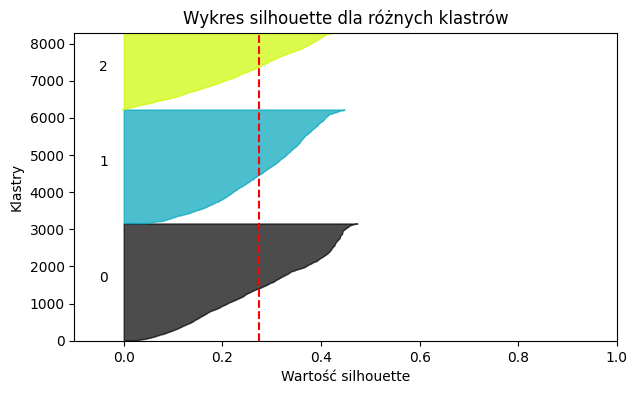

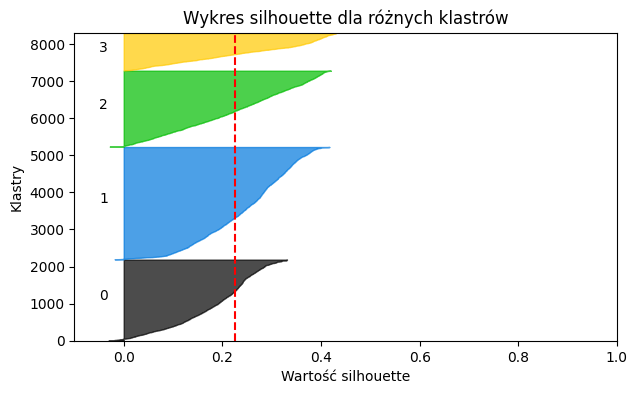

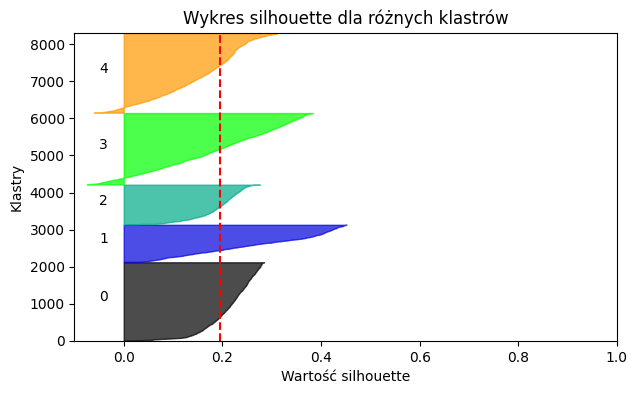

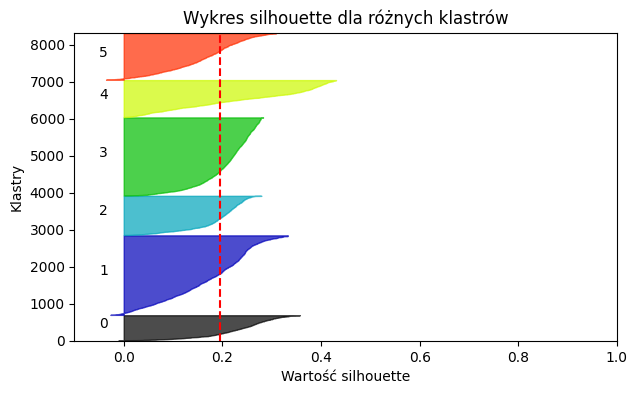

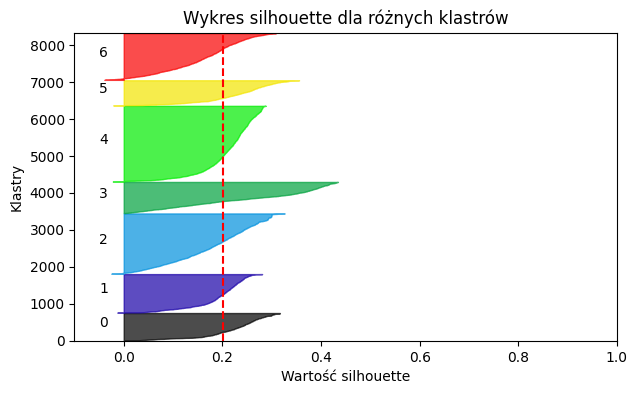

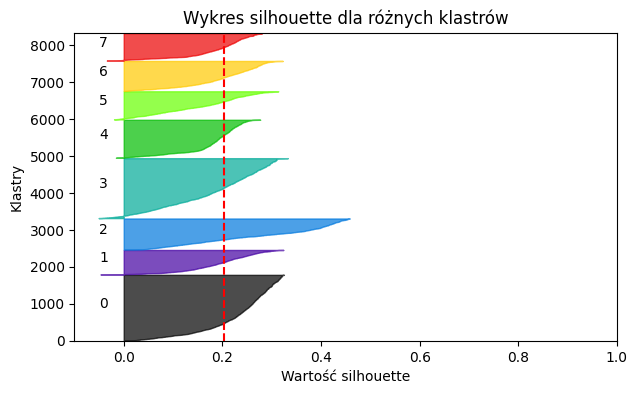

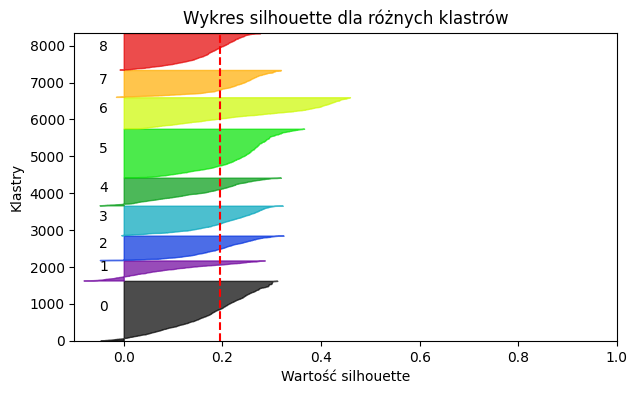

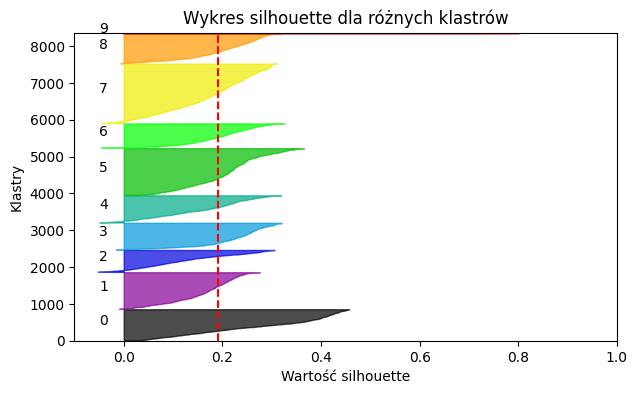

K=2, Średni Silhouette Score: 0.2675
K=3, Średni Silhouette Score: 0.2742
K=4, Średni Silhouette Score: 0.2263
K=5, Średni Silhouette Score: 0.1959
K=6, Średni Silhouette Score: 0.1960
K=7, Średni Silhouette Score: 0.2018
K=8, Średni Silhouette Score: 0.2037
K=9, Średni Silhouette Score: 0.1948
K=10, Średni Silhouette Score: 0.1915


In [191]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    cluster_labels = kmeans.fit_predict(X_2)
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_2, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 4)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_2) + (k + 1) * 10])

    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Wykres silhouette dla różnych klastrów")
    ax1.set_xlabel("Wartość silhouette")
    ax1.set_ylabel("Klastry")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

for k, score in enumerate(silhouette_scores):
    print(f"K={k+2}, Średni Silhouette Score: {score:.4f}")